In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import sys, os
sys.path.insert(0, os.path.abspath('..'))

In [3]:
from scripts import project_functions
df = project_functions.load_and_process(r"..\..\data\raw\UniversitiesDataSet.csv") #I am just showing that I can do this but I am going to analyze raw data

Inspect data types, number of null values, mean, median, min and max for each year:

1) 2012 and 2013 is missing data in broad impact column

2) Dramatic increase in all mean and median for all the columns after 2013 (because there were only 100 schools ranked in 2012 and 2013)

3) Addition of lower ranked schools increased the mean and median of alumni employment rate

In [6]:
def uni_eda(df): 
    
    years = list(df.groupby('year').groups.keys())
    years_i = df.groupby('year')
    dfs = []
    for i in range(len(years)):
        
        df_h = years_i.get_group(years[i])
        eda_df = {}
        eda_df['null_sum'] = df_h.isnull().sum()
        eda_df['dtypes'] = df_h.dtypes
        eda_df['mean'] = df_h.mean()
        eda_df['median'] = df_h.median()
        eda_df['min'] = df_h.min()
        eda_df['max'] = df_h.max()
        
        dfs.append(pd.DataFrame(eda_df)) 
        final_df = pd.concat(dfs, keys = ['2014', '2015'])
    return final_df
uni_eda(df)

null_sum   dtypes          mean      median  \
2014 Score - Avg                  0  float64  4.075600e-01    -1.75385   
     alumni_employment            0    int64  3.639910e+02   478.00000   
     broad_impact                 0  float64  4.967350e+02   496.00000   
     citations                    0    int64  4.473490e+02   493.00000   
     country                      0   object           NaN         NaN   
     influence                    0    int64  5.001630e+02   500.50000   
     institution                  0   object           NaN         NaN   
     national_rank                0    int64  4.252400e+01    22.00000   
     patents                      0    int64  4.489680e+02   481.00000   
     publications                 0    int64  5.004110e+02   500.50000   
     quality_of_education         0    int64  2.921640e+02   355.00000   
     quality_of_faculty           0    int64  1.880020e+02   210.00000   
     score                        0  float64  4.727141e+01    45.11000   
     world_rank                   0    int64  5.005000e+02   500.50000   
     year                         0    int64  2.014000e+03  2014.00000   
2015 Score - Avg                  0  float64  9.094947e-16    -2.08385   
     alumni_employment            0    int64  4.065360e+02   500.50000   
     broad_impact                 0  float64  4.966640e+02   495.00000   
     citations                    0    int64  4.513340e+02   428.00000   
     country                      0   object           NaN         NaN   
     influence                    0    int64  5.002750e+02   500.50000   
     institution                  0   object           NaN         NaN   
     national_rank                0    int64  4.251200e+01    22.00000   
     patents                      0    int64  4.916740e+02   500.50000   
     publications                 0    int64  5.004190e+02   500.50000   
     quality_of_education         0    int64  2.998390e+02   367.00000   
     quality_of_faculty           0    int64  1.942530e+02   218.00000   
     score                        0  float64  4.686385e+01    44.78000   
     world_rank                   0    int64  5.005000e+02   500.50000   
     year                         0    int64  2.015000e+03  2015.00000   

                                                                min  \
2014 Score - Avg                                           -2.68385   
     alumni_employment                                            1   
     broad_impact                                                 1   
     citations                                                    1   
     country                                              Argentina   
     influence                                                    1   
     institution           AGH University of Science and Technology   
     national_rank                                                1   
     patents                                                      1   
     publications                                                 1   
     quality_of_education                                         1   
     quality_of_faculty                                           1   
     score                                                    44.18   
     world_rank                                                   1   
     year                                                      2014   
2015 Score - Avg                                           -2.84385   
     alumni_employment                                            1   
     broad_impact                                                 1   
     citations                                                    1   
     country                                              Argentina   
     influence                                                    1   
     institution           AGH University of Science and Technology   
     national_rank                                                1   
     patents                

What is the shape of dataframe?

In [7]:
df.shape

(2000, 15)

Let's convert all floats to integers for convenience

In [6]:
df.broad_impact = df.broad_impact.astype(int)
df.score = df.score.astype(int)

Look at the spread of numerical values:

In [8]:
df.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,500.500000,42.518000,296.001500,385.263500,191.127500,500.415000,500.21900,449.341500,496.699500,470.321000,46.611500,2014.500000
std,288.747186,53.444193,106.868798,171.874782,52.402579,288.674823,288.30505,250.141228,286.919755,259.625408,6.585306,0.500125
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,44.000000,2014.000000
25%,250.750000,7.000000,250.750000,250.750000,210.000000,250.750000,250.75000,234.000000,250.500000,242.750000,44.000000,2014.000000
50%,500.500000,22.000000,355.000000,478.000000,210.000000,500.500000,500.50000,428.000000,496.000000,481.000000,44.000000,2014.500000
75%,750.250000,52.000000,367.000000,500.250000,218.000000,750.000000,750.25000,645.000000,741.000000,737.000000,46.000000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.00000,812.000000,1000.000000,871.000000,100.000000,2015.000000


Do we have outliers? (I will display only those that have)

<AxesSubplot:>

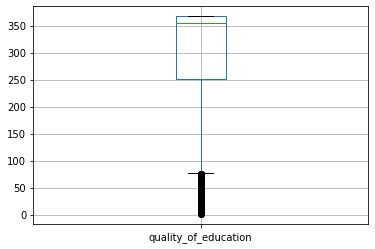

In [10]:
df.boxplot('quality_of_education') #hm, seems so!

<AxesSubplot:>

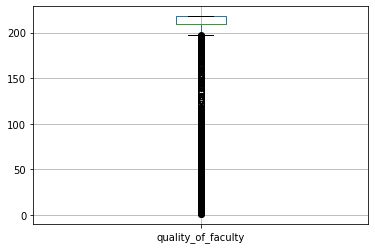

In [12]:
df.boxplot('quality_of_faculty')

We are not going to do anything with them, because it will affect the whole dataset (quality_of_factulty has too many outliers). But now when analyzing, we need to keep in mind what columns have outliers.

Look at the correlation accross the dataset

<AxesSubplot:>

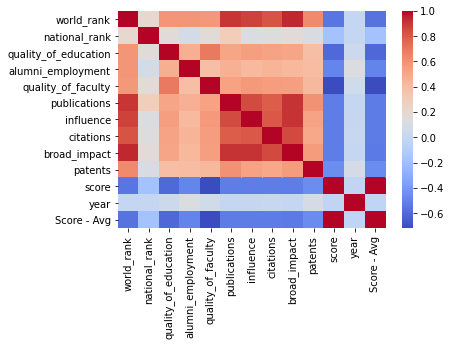

In [13]:
sns.heatmap(df.corr(), cmap='coolwarm')

We see high corrolation between publications and world rank, broad impact and world rank and others and lower between national rank and quality of education. Interesting!

Now let's take a look at group's research question: what indicators lead to higher alumni employment? (Here I used the old data set because I wanted to explore older data as well)

Show the pairwise correlations between all the columns and alumni employment rate for all years (2012-2015)

So far it seems that world_rank has the most impact on the alumni_employment (or it might be the other way, that alumni_employment had an impact on world_rank and schools ranked higher because of higher employment of graduates)

<AxesSubplot:>

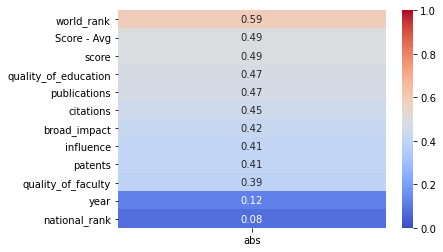

In [9]:
correlations = df.corrwith(df['alumni_employment']).to_frame().drop('alumni_employment')
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values(['abs'], ascending=False)['abs']
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=0, vmax=1)

Show the pairwise correlations between all the columns and alumni employment rate for each year

For 2014-2015, we see that world_rank is correlated with alumni_employment 

In [12]:
def plot_each_year(year, df):
    years = list(df.groupby('year').groups.keys())
    years_i = df.groupby('year')
    correlations = years_i.get_group(year).corrwith(df['alumni_employment']).to_frame().drop(['alumni_employment', 'year'])
    correlations['abs'] = correlations[0].abs()
    sorted_correlations = correlations.sort_values(['abs'], ascending=False)['abs']
    return sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=0, vmax=1)

In [15]:
def plotting(year):
    if year == 2014:
        plot_each_year(2014,df)
    elif year == 2015:
        plot_each_year(2015,df)
    else:
        print('There is no information for this year')

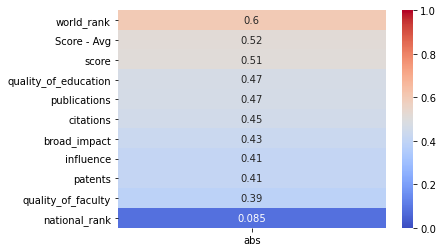

In [16]:
plotting(2014)

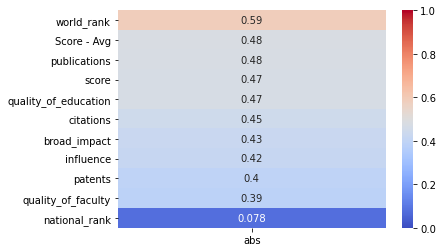

In [17]:
plotting(2015)

How does the country of an institution affect alumni employemnt rate overall?

I think, because more developed countries might be more focused on research, they have lower alumni employment (since their alumnis are going into grad schools), while less developed countries are more interested in graduating people who would actually go get the job. But we would have to check publication, influence, citation and patents to make sure that there is a relation.

C:\Users\ww\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Country vs. Alumni Employment rate')

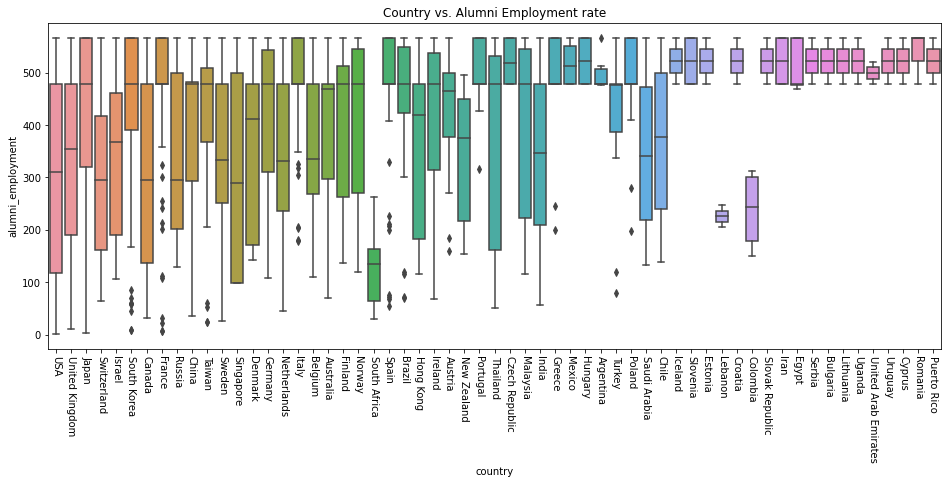

In [19]:
def country_plot(df):
    plt.figure(figsize=(16, 6))
    plt.xticks(rotation=270)
    return sns.boxplot(df['country'], df['alumni_employment']).set_title('Country vs. Alumni Employment rate')
country_plot(df)